In [1]:
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
from matplotlib_venn import venn3

In [2]:
alphas = [0,0.2,0.5,0.65,0.8,0.9,1]
rankings = []

In [3]:
for alpha in alphas:
    df = pd.read_csv('ranking_'+str(alpha),header = None)
    df = df[df.index<100]
    ranking = df[0].tolist()
    rankings.append(ranking)   

In [4]:
ranking0 = rankings[0]
ranking1 = rankings[6]
ranking65 = rankings[3]
ranking0top = rankings[0][0:50]
ranking0bot = rankings[0][50:100]
ranking1top = rankings[6][0:50]
ranking1bot = rankings[6][50:100]
ranking65top = rankings[3][0:50]
ranking65bot = rankings[3][50:100]

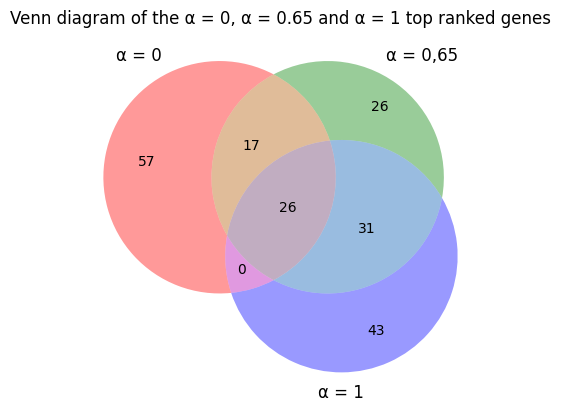

In [5]:
set1 = set(ranking0)
set2 = set(ranking65)
set3 = set(ranking1)
v=venn3([set1, set2, set3], ('\u03B1 = 0', '\u03B1 = 0,65', '\u03B1 = 1'))
plt.title('Venn diagram of the \u03B1 = 0, \u03B1 = 0.65 and \u03B1 = 1 top ranked genes',size=12)
plt.savefig('Venn_diagram_alpha.png',bbox_inches="tight")
plt.show()

In [6]:
def overlap3(l1,l2,l3):
    res = []
    for i in l1:
        if i in l2:
            if i in l3:
                res.append(i)   
    return res

In [7]:
def overlap3not(l1,l2,l3):
    res = []
    for i in l1:
        if i in l2:
            if i not in l3:
                res.append(i)   
    return res

In [8]:
def overlap3notnot(l1,l2,l3):
    res = []
    for i in l1:
        if i not in l2:
            if i not in l3:
                res.append(i)     
    return res

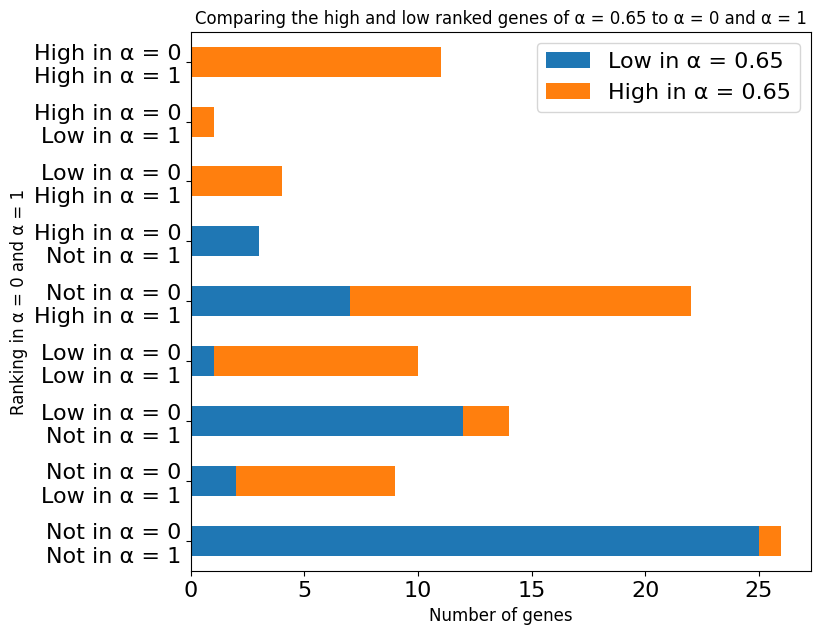

In [9]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

# Data
groups = ['High in \u03B1 = 0\nHigh in \u03B1 = 1', 'High in \u03B1 = 0\nLow in \u03B1 = 1','Low in \u03B1 = 0\nHigh in \u03B1 = 1','High in \u03B1 = 0\nNot in \u03B1 = 1', 'Not in \u03B1 = 0\nHigh in \u03B1 = 1','Low in \u03B1 = 0\nLow in \u03B1 = 1','Low in \u03B1 = 0\nNot in \u03B1 = 1','Not in \u03B1 = 0\nLow in \u03B1 = 1','Not in \u03B1 = 0\nNot in \u03B1 = 1']
values1 = [len(overlap3(ranking65bot,ranking0top,ranking1top)),len(overlap3(ranking65bot,ranking0top,ranking1bot)),len(overlap3(ranking65bot,ranking0bot,ranking1top)),len(overlap3not(ranking65bot,ranking0top,ranking1)),len(overlap3not(ranking65bot,ranking1top,ranking0)),len(overlap3(ranking65bot,ranking0bot,ranking1bot)),len(overlap3not(ranking65bot,ranking0bot,ranking1)),len(overlap3not(ranking65bot,ranking1bot,ranking0)),len(overlap3notnot(ranking65bot,ranking0,ranking1))]
values2 = [len(overlap3(ranking65top,ranking0top,ranking1top)),len(overlap3(ranking65top,ranking0top,ranking1bot)),len(overlap3(ranking65top,ranking0bot,ranking1top)),len(overlap3not(ranking65top,ranking0top,ranking1)),len(overlap3not(ranking65top,ranking1top,ranking0)),len(overlap3(ranking65top,ranking0bot,ranking1bot)),len(overlap3not(ranking65top,ranking0bot,ranking1)),len(overlap3not(ranking65top,ranking1bot,ranking0)),len(overlap3notnot(ranking65top,ranking0,ranking1))]

groups.reverse()
values1.reverse()
values2.reverse()

df = pd.DataFrame({'Low in \u03B1 = 0.65': values1,'High in \u03B1 = 0.65': values2}, index=groups)

ax = df.plot.barh(figsize =(8,7), stacked=True)

plt.xlabel('Number of genes',size=12)
plt.ylabel('Ranking in \u03B1 = 0 and \u03B1 = 1',size=12)
plt.title('Comparing the high and low ranked genes of \u03B1 = 0.65 to \u03B1 = 0 and \u03B1 = 1', size = 12)
plt.savefig('high_and_low_rankings_compared.png',bbox_inches="tight")



In [10]:
def remap_ranking(ranking):
    N = len(ranking)
    Max = max(ranking)
    ranking_indices = []
    for j in range(N):
        m = min(ranking)
        m_i = ranking.index(m)
        ranking_indices.append(m_i)
        ranking[m_i] = Max + 1
    ranking_new = np.zeros(N,dtype=int)
    for i in range(N):
        ranking_new[ranking_indices[i]]=i+1
    return ranking_new.tolist()

In [11]:
def calculate_rank_correlation(rankingA,rankingB):
    ranksA = []
    ranksB = []
    n = 0
    D = 0
    for g in rankingA:
        if g in rankingB:
            ranksA.append(rankingA.index(g)+1)
            ranksB.append(rankingB.index(g)+1)
            n = n+1
    ranksA = remap_ranking(ranksA)
    ranksB = remap_ranking(ranksB)
    for i in range(len(ranksA)):
        d = ranksA[i]-ranksB[i]
        D = D + pow(d,2)
    r = 1 - 6*D/(n*(pow(n,2)-1))
    return r    

In [12]:
dat = {}
ind = []
for i in range(len(alphas)):
    r = []
    for j in range(len(alphas)):
        r.append(calculate_rank_correlation(rankings[i],rankings[j]))
    exec("dat['Alpha = %.2f']=%s" % (alphas[i],r))
    exec("ind.append('Alpha = %.2f')" % (alphas[i]))

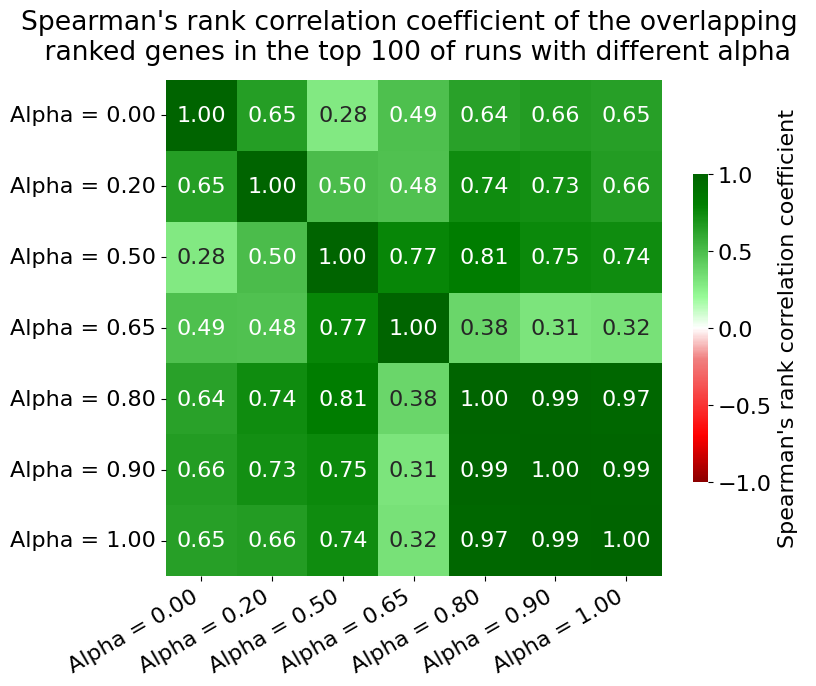

In [27]:
df_plot = pd.DataFrame(dat,ind)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
from  matplotlib.colors import LinearSegmentedColormap
c = ["darkred","red","lightcoral","white","palegreen","green","darkgreen"]
v = [0,.15,.4,0.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)
hm = sns.heatmap(df_plot,ax=ax,square=True,cmap=cmap,annot=True,fmt='.2f',vmin=-1,vmax=1,cbar_kws={'label':'Spearman\'s rank correlation coefficient','shrink':0.5})
hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right')
ax.set_title('Spearman\'s rank correlation coefficient of the overlapping \n ranked genes in the top 100 of runs with different alpha',pad=15)
plt.savefig('Rank_correlation_coefficient.png',bbox_inches="tight")
plt.show()

In [14]:
i = 0
for alpha in alphas:
    exec("%s = []" % ('not_in_alpha_index_'+str(i))) #alpha_index 0 --> alpha = 0, alpha_index 1 --> alpha = 0.2, ...
    exec("%s = []" % ('not_in_alpha_index_count_'+str(i)))
    for r in rankings:
        genes = []
        for g in r:
            if g not in rankings[i]:
                genes.append(g)
        exec("%s.append(genes)" % ('not_in_alpha_index_'+str(i)))
        exec("%s.append(len(genes))" % ('not_in_alpha_index_count_'+str(i)))
    i=i+1

In [15]:
data = {}
index = []
i = 0
for alpha in alphas:
    exec("data['Alpha = %.2f']=%s" % (alpha,'not_in_alpha_index_count_'+str(i)))
    i=i+1  
    exec("index.append('Alpha = %.2f')" % (alpha))
for d in data:
    data[d] = [100 - x for x in data.get(d)]
print(data)
index

{'Alpha = 0.00': [100, 83, 77, 43, 28, 28, 26], 'Alpha = 0.20': [83, 100, 70, 39, 24, 24, 22], 'Alpha = 0.50': [77, 70, 100, 63, 36, 35, 33], 'Alpha = 0.65': [43, 39, 63, 100, 59, 58, 57], 'Alpha = 0.80': [28, 24, 36, 59, 100, 98, 95], 'Alpha = 0.90': [28, 24, 35, 58, 98, 100, 97], 'Alpha = 1.00': [26, 22, 33, 57, 95, 97, 100]}


['Alpha = 0.00',
 'Alpha = 0.20',
 'Alpha = 0.50',
 'Alpha = 0.65',
 'Alpha = 0.80',
 'Alpha = 0.90',
 'Alpha = 1.00']

In [16]:
data2 = {}
text = np.zeros([len(alphas),len(alphas)],dtype=object)
index2 = []
data_empty = {}
zeros = []
for a in range(len(alphas)):
    zeros.append(0)
    
i = 0
for alpha in alphas:
    exec("data2['Not in alpha = %.2f']=%s" % (alpha,'not_in_alpha_index_'+str(i)))
    i=i+1  
    exec("index2.append('In alpha = %.2f')" % (alpha))
    exec("data_empty['Not in alpha = %.2f']=%s" % (alpha,zeros))
j = 0
for d2 in data2:
    for i in range(len(alphas)):
        text[j][i] = " ".join(data2[d2][i][0:5])
    j = j+1
#print(data2)
print(text)
print(data_empty)
index2

[['' 'PTEN SPTBN1 NRXN3 COL11A1 IL1RAPL2' 'GNAI2 GNAI1 SP3 CAMK2A PTEN'
  'AR RAC1 GNAI2 GNAI1 TCF12' 'RAC1 GNB1 STAT2 MYC TCF12'
  'RAC1 STAT2 GNB1 MYC TCF12' 'RAC1 STAT2 GNB1 MYC TCF12']
 ['CDH1 ACTBL2 ITGA7 ITGA2 COL1A2' '' 'GPLD1 RELA GNAI2 GNAI1 SP3'
  'GPLD1 AR RAC1 GNAI2 GNAI1' 'RAC1 GNB1 STAT2 MYC TCF12'
  'RAC1 STAT2 GNB1 MYC TCF12' 'RAC1 STAT2 GNB1 GPLD1 MYC']
 ['PCDHA12 PCDH11X PCDHB12 PCDHGA3 PCDHA5'
  'PCDH11X PCDHA12 PCDHB12 PCDHA5 PCDHGA2' ''
  'RAC1 TCF12 CDC42 MYC KCNAB2' 'RAC1 GNB1 STAT2 MYC TCF12'
  'RAC1 STAT2 GNB1 MYC TCF12' 'RAC1 STAT2 GNB1 MYC TCF12']
 ['PCDH15 FAT3 PCDHA12 FAT2 PCDHB7' 'PCDH15 DCHS1 FAT2 PCDH10 PCDHB6'
  'PCDH15 DCHS1 FAT2 PCDH10 PCDHB6' '' 'STAT2 EGR1 NFKB1 SPI1 TAF1'
  'STAT2 EGR1 NFKB1 SPI1 TAF1' 'STAT2 EGR1 SPI1 NFKB1 TAF1']
 ['CTNNAL1 CDH23 PCDH15 FAT3 PCDHA12' 'CTNNAL1 PCDH15 CDH23 DCHS1 PCDHA1'
  'CTNNAL1 ITGA9 DLG4 PCDHA1 CDH23' 'PTEN PLCB4 ITGA9 NGF MED1' ''
  'BRCA1 ZBTB7A' 'BRCA1 ZBTB7A UBE2I MAX PEX2']
 ['CTNNAL1 CDH23 PCDH15 FAT3 PC

['In alpha = 0.00',
 'In alpha = 0.20',
 'In alpha = 0.50',
 'In alpha = 0.65',
 'In alpha = 0.80',
 'In alpha = 0.90',
 'In alpha = 1.00']

In [17]:
for i1 in range(len(alphas)):
    for i2 in range(len(alphas)):
        s = text[i1,i2].split()
        if len(s) == 1:
            text[i1,i2] = s[0]
        elif len(s) == 2:
            text[i1,i2] = s[0] +'\n'+ s[1]
        elif len(s) == 3:
            text[i1,i2] = s[0] +'\n'+ s[1] +'\n'+ s[2]
        elif len(s) == 4:
            text[i1,i2] = s[0] +'\n'+ s[1] +'\n'+ s[2] + '\n' + s[3]
        elif len(s) > 4:
            text[i1,i2] = s[0] +'\n'+ s[1] +'\n'+ s[2] + '\n' + s[3] +'\n'+ s[4]

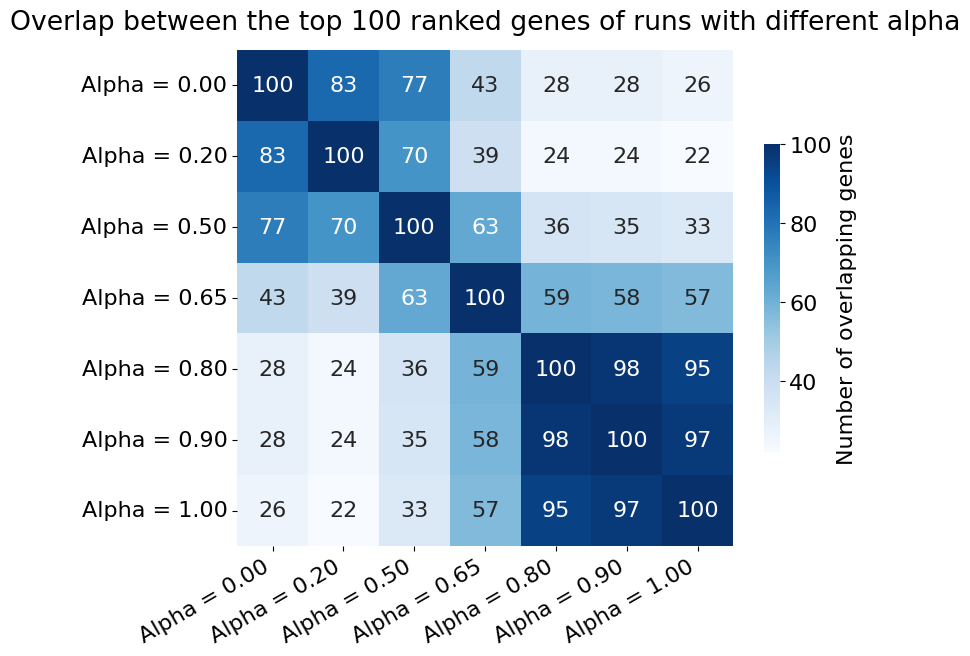

In [18]:
df_plot = pd.DataFrame(data, index)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
hm = sns.heatmap(df_plot,ax=ax,square=True,cmap='Blues',annot=True,fmt='g',cbar_kws={'label':'Number of overlapping genes','shrink':0.5})
hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right')
ax.set_title('Overlap between the top 100 ranked genes of runs with different alpha',pad=15)
plt.savefig('Overlap_rankings_alpha.png',bbox_inches="tight")
plt.show()

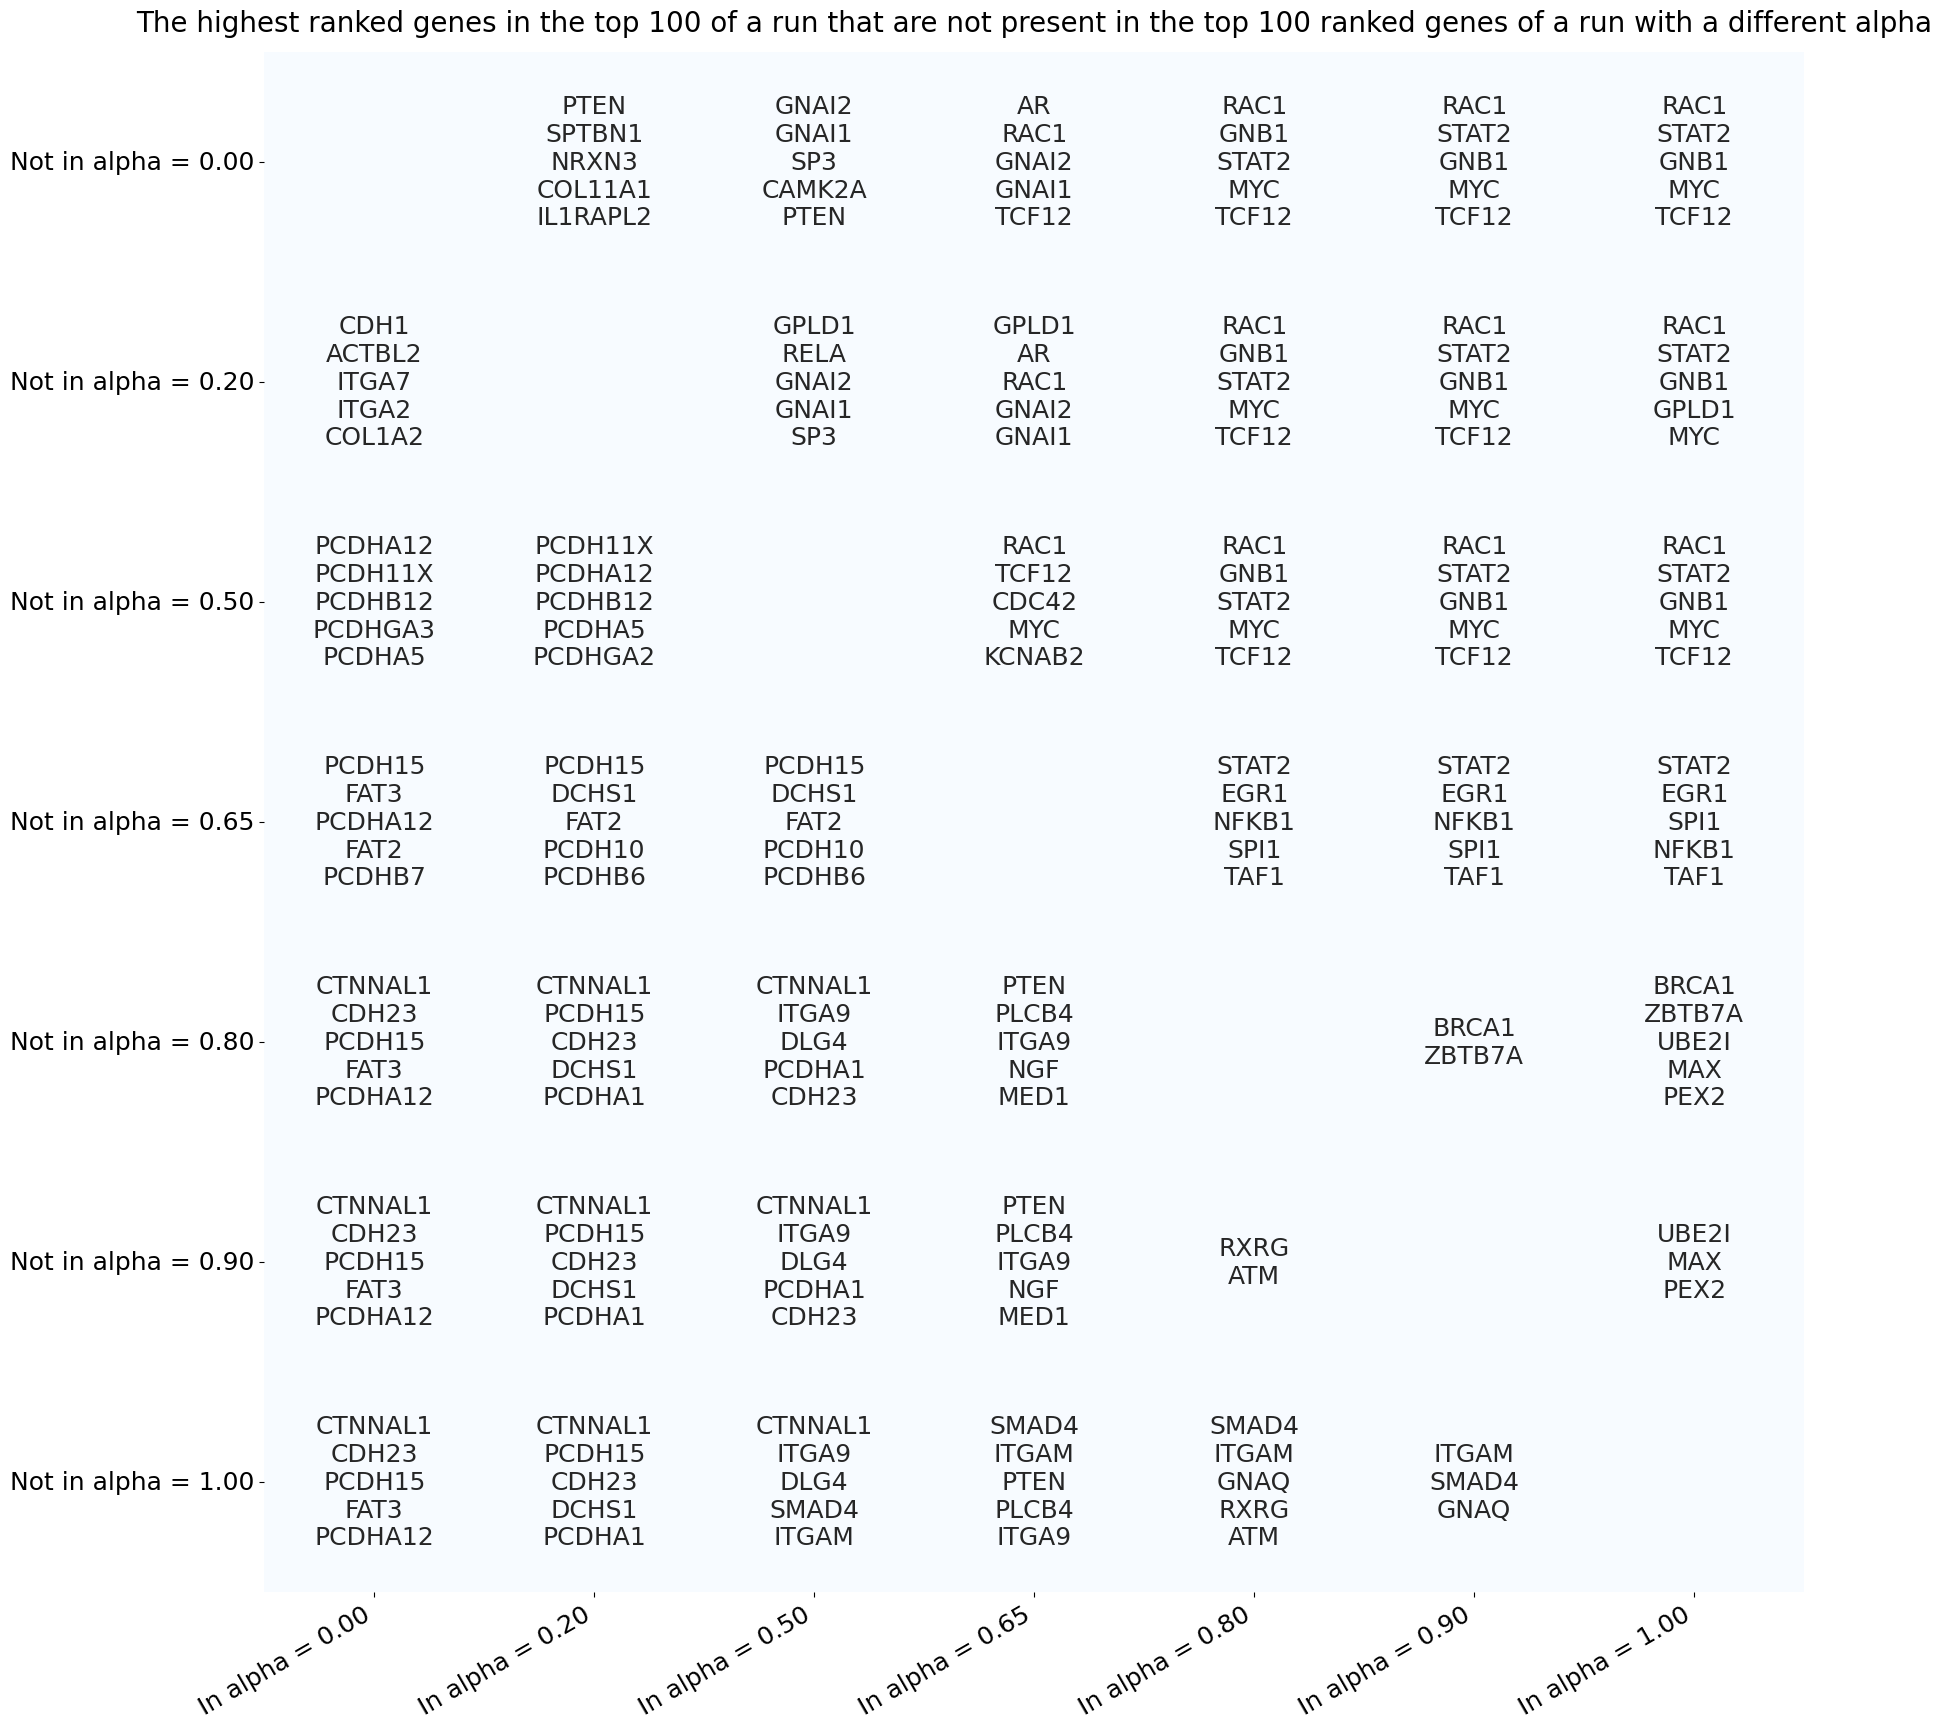

In [19]:
df_plot = pd.DataFrame(data_empty, index2)
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
hm = sns.heatmap(df_plot.transpose(),ax=ax,square=True,cmap='Blues',annot=text,fmt='',cbar=False,annot_kws={"size":18})
hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right',size=18)
hm.set_yticklabels(hm.get_yticklabels(),rotation=0,size=18)
ax.set_title('The highest ranked genes in the top 100 of a run that are not present in the top 100 ranked genes of a run with a different alpha',pad=15,size=20)
plt.savefig('Non_overlapping_genes_rankings_alpha.png',bbox_inches="tight")
plt.show()